In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [2]:
out_dir = os.path.join(os.getcwd(), "../../out/pca")

In [3]:
def plot_data(data, x, y, z, ax=None, set_labels=True):
    if set_labels:
        ax.set_xlabel(x)
        ax.set_ylabel(y)
        ax.set_zlabel(z)

    ax.scatter(data[x], data[y], data[z])

In [4]:
df = pd.read_csv('data/fish.csv')[['Width', 'Height', 'Length1', 'Weight']].rename(columns={
    'Width': 'width (cm)',
    'Length1': 'length (cm)',
    'Height': 'height (cm)',
    'Weight': 'weight (g)'
})

df_std = pd.DataFrame(StandardScaler().fit_transform(df), index=df.index, columns=df.columns)

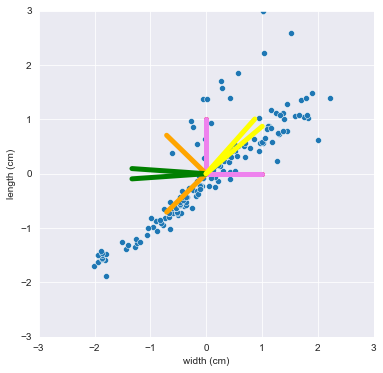

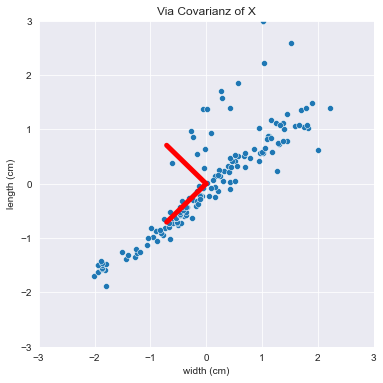

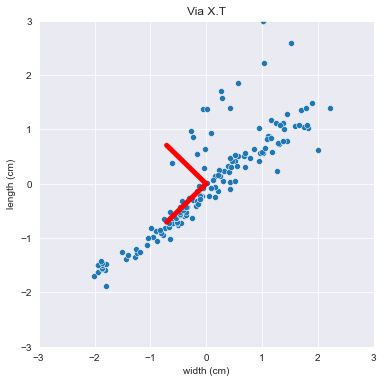

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)

def plot_unit_vectors(unit_vectors, color):
    plot_vector(unit_vectors[:, 0], color=color)
    plot_vector(unit_vectors[:, 1], color=color)

def plot_vector(v, color):
    ax.plot([0, v[0]], [0, v[1]], color=color, linewidth=5)

X = df_std[['width (cm)', 'length (cm)']]

sigma = np.cov(X.T)

unit_vectors = np.array([[1, 0], [0, 1]])
plot_unit_vectors(unit_vectors, color='red')

U, S, V = np.linalg.svd(sigma)

sigma_PC = np.cov(X.dot(U).T)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plot_unit_vectors(unit_vectors.T, color='violet')
plot_unit_vectors(U.T.dot(unit_vectors.T), color='orange')
plot_unit_vectors(np.diag(S).T.dot(U.T).dot(unit_vectors.T), color='green')
plot_unit_vectors(V.T.dot(np.diag(S).T).dot(U.T).dot(unit_vectors.T), color='yellow')

"""
Show/Check that np.cov and X.T can be used to get PCA...
"""

U_X, S_X, V_X = np.linalg.svd(np.cov(X))
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.title("Via Covarianz of X")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)
plot_unit_vectors(U, color='red')

U_X, S_X, V_X = np.linalg.svd(X.T)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
plt.title("Via X.T")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)
plot_unit_vectors(U_X, color='red')

## Feature selection - Intuition

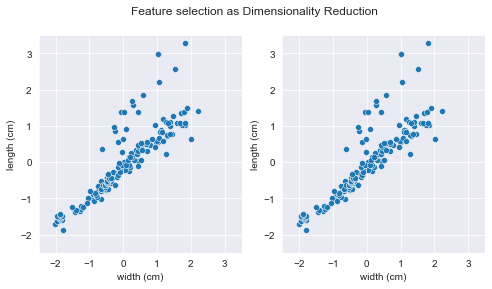

In [6]:
def plot_error_x_y(x1, x2, y1, y2, ax):
    ax.plot([x1, x2], [y1, y2], c='red', alpha=0.2)

def plot_error_x(x1, x2, y1, ax):
    ax.plot([x1, x2], [y1, y1], c='red', alpha=0.2)

def plot_error_y(x, y1, y2, ax):
    ax.plot([x, x], [y1, y2], c='red', alpha=0.2)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Feature selection as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[1])
axes[0].set_xlim((-2.5, 3.5)), axes[0].set_ylim((-2.5, 3.5))
axes[1].set_xlim((-2.5, 3.5)), axes[1].set_ylim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, 'feature-selection-data-only.png'), facecolor='white', transparent=False)
plt.show()

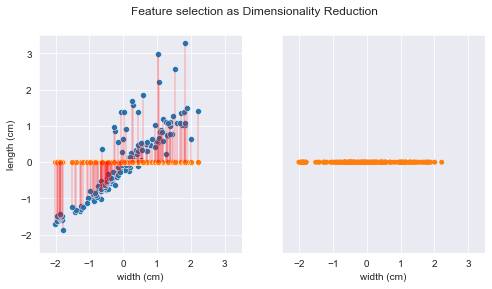

In [7]:
def plot_error_x_y(x1, x2, y1, y2, ax):
    ax.plot([x1, x2], [y1, y2], c='red', alpha=0.2)

def plot_error_x(x1, x2, y1, ax):
    ax.plot([x1, x2], [y1, y1], c='red', alpha=0.2)

def plot_error_y(x, y1, y2, ax):
    ax.plot([x, x], [y1, y2], c='red', alpha=0.2)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Feature selection as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(data=df_std, x='width (cm)', y=0, ax=axes[0])
# sns.scatterplot(data=df_std, x=0, y='length (cm)', ax=axes[0])

for _, row in df_std.iterrows():
    plot_error_y(row['width (cm)'], row['length (cm)'], 0, axes[0])

sns.stripplot(data=df_std, x='width (cm)', ax=axes[1], jitter=0, color=sns.color_palette()[1])
axes[0].set_xlim((-2.5, 3.5)), axes[0].set_ylim((-2.5, 3.5))
axes[1].set_xlim((-2.5, 3.5)), axes[1].set_ylim((-2.5, 3.5))
# sns.stripplot(data=df_std, x='length (cm)', ax=axes[2], jitter=0, color=sns.color_palette()[2])
plt.savefig(os.path.join(out_dir, 'feature-selection-1.png'), facecolor='white', transparent=False)
plt.show()

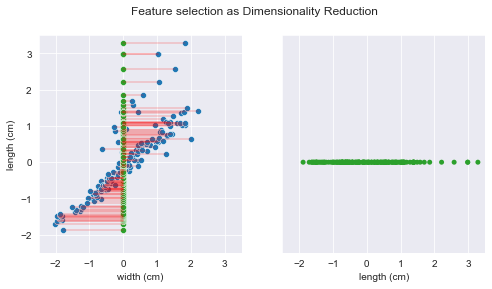

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Feature selection as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(data=df_std, x=0, y='length (cm)', ax=axes[0], color=sns.color_palette()[2])

for _, row in df_std.iterrows():
    plot_error_x(row['width (cm)'], 0, row['length (cm)'], axes[0])

sns.stripplot(data=df_std, x='length (cm)', ax=axes[1], jitter=0, color=sns.color_palette()[2])
axes[0].set_xlim((-2.5, 3.5)), axes[0].set_ylim((-2.5, 3.5))
axes[1].set_xlim((-2.5, 3.5)), axes[1].set_ylim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, 'feature-selection-2.png'), facecolor='white', transparent=False)
plt.show()


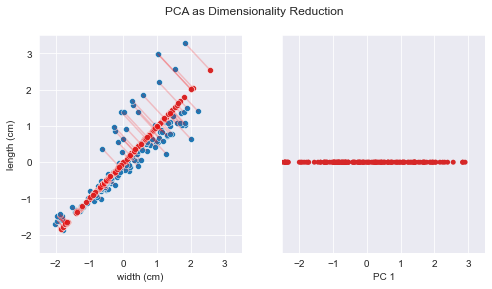

In [37]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

pca_1 = PCA(n_components=1).fit(df_std[['width (cm)', 'length (cm)']])

pca_1_proj = pca_1.transform(df_std[['width (cm)', 'length (cm)']])
pca_1_re = pca_1.inverse_transform(pca_1_proj)

fig.suptitle("PCA as Dimensionality Reduction")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
sns.scatterplot(x=pca_1_re[:, 0], y=pca_1_re[:, 1], color=sns.color_palette()[3], ax=axes[0])

for (_, row), x2, y2 in zip(df_std.iterrows(), pca_1_re[:, 0], pca_1_re[:, 1]):
    plot_error_x_y(row['width (cm)'], x2, row['length (cm)'], y2, axes[0])

gfg = sns.stripplot(x=pca_1_proj, jitter=0, color=sns.color_palette()[3], ax=axes[1])
gfg.set_xlabel("PC 1")
axes[0].set_xlim((-2.5, 3.5)), axes[0].set_ylim((-2.5, 3.5))
axes[1].set_xlim((-2.5, 3.5)), axes[1].set_ylim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, 'pca-1.png'), facecolor='white', transparent=False)
plt.show()

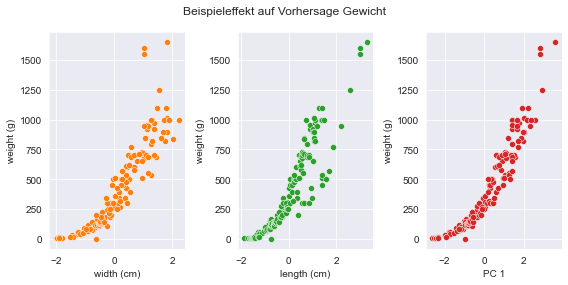

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
fig.suptitle("Beispieleffekt auf Vorhersage Gewicht")
sns.scatterplot(data=df_std, x='width (cm)', y=df['weight (g)'], ax=axes[0], color=sns.color_palette()[1])
sns.scatterplot(data=df_std, x='length (cm)', y=df['weight (g)'], ax=axes[1], color=sns.color_palette()[2])
gfg = sns.scatterplot(x=pca_1_proj[:, 0], y=df['weight (g)'], ax=axes[2], color=sns.color_palette()[3])
gfg.set_xlabel("PC 1")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, 'pca-example.png'), facecolor='white', transparent=False)
plt.show()

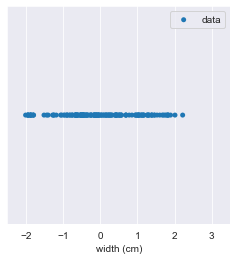

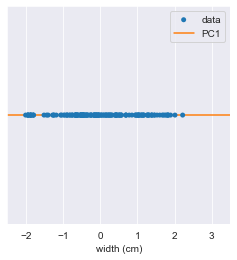

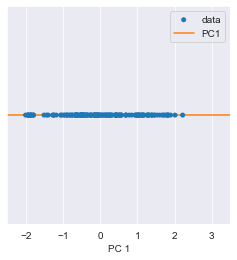

In [11]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.stripplot(data=df_std, x='width (cm)', ax=ax, jitter=False)
ax.legend(['data'])
ax.set_xlim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, f'pca-1d-anim-data.png'), facecolor='white', transparent=False)
plt.show()

pca_1 = PCA(n_components=1).fit(df_std[['width (cm)']])

colors = list(sns.color_palette())[1:]

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.stripplot(data=df_std, x='width (cm)', ax=ax, jitter=False)

# plot components
ax.plot(
    [-pca_1.components_[0, 0]*10, pca_1.components_[0, 0]*10],
    [0, 0],
    color=colors[0],
    # linewidth=pca_1.explained_variance_[j] * 5,
)

ax.legend(['data', 'PC1'])
ax.set_xlim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, f'pca-1d-anim-1.png'), facecolor='white', transparent=False)

plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
df_std['PC 1'] = df_std['width (cm)']
sns.stripplot(data=df_std, x='PC 1', ax=ax, jitter=False)

# plot components
ax.plot(
    [-pca_1.components_[0, 0]*10, pca_1.components_[0, 0]*10],
    [0, 0],
    color=colors[0],
    # linewidth=pca_1.explained_variance_[j] * 5,
)

ax.legend(['data', 'PC1'])
ax.set_xlim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, f'pca-1d-anim-pc1.png'), facecolor='white', transparent=False)
plt.show()

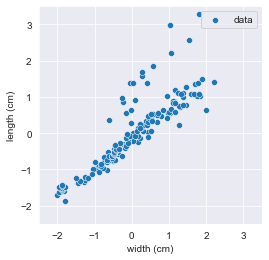

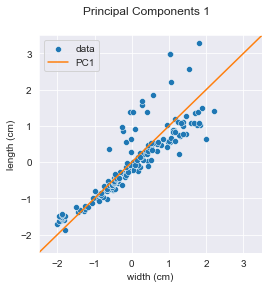

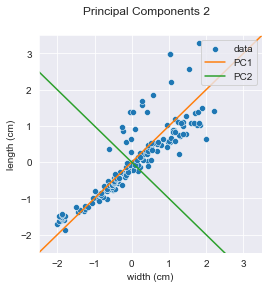

In [12]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)
ax.legend(['data'])
ax.set_xlim((-2.5, 3.5)), ax.set_ylim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, f'pca-2d-anim-data.png'), facecolor='white', transparent=False)
plt.show()

pca_2 = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

colors = list(sns.color_palette())[1:]

for i in range(1, 3):
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    fig.suptitle(f"Principal Components {i}")
    sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)

    for j in range(i - 1):
        # plot components
        ax.plot(
            [-pca_2.components_[j, 0]*10, pca_2.components_[j, 0]*10],
            [-pca_2.components_[j, 1]*10, pca_2.components_[j, 1]*10],
            color=colors[j],
            # linewidth=pca_2.explained_variance_[j] * 5,
        )

    # plot components
    ax.plot(
        [-pca_2.components_[i-1, 0]*10, pca_2.components_[i-1, 0]*10],
        [-pca_2.components_[i-1, 1]*10, pca_2.components_[i-1, 1]*10],
        color=colors[i-1],
    )

    ax.legend(['data', 'PC1', 'PC2'])
    ax.set_xlim((-2.5, 3.5)), ax.set_ylim((-2.5, 3.5))
    plt.savefig(os.path.join(out_dir, f'pca-2d-anim-{i}.png'), facecolor='white', transparent=False)

    plt.show()

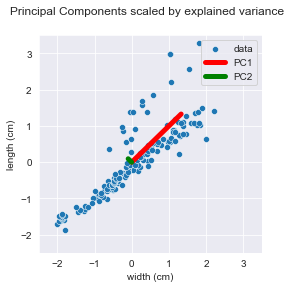

In [13]:
from sklearn.decomposition import PCA

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

pca_2 = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

fig.suptitle("Principal Components scaled by explained variance")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)

# plot components
ax.plot(
    [0, pca_2.components_[0, 0] * pca_2.explained_variance_[0]],
    [0, pca_2.components_[0, 1] * pca_2.explained_variance_[0]],
    color='red',
    linewidth=5
)
ax.plot(
    [0, pca_2.components_[1, 0] * pca_2.explained_variance_[1]],
    [0, pca_2.components_[1, 1] * pca_2.explained_variance_[1]],
    color='green',
    linewidth=5
)
ax.legend(['data', 'PC1', 'PC2'])

gfg.set_xlabel("PC 1")
ax.set_xlim((-2.5, 3.5)), ax.set_ylim((-2.5, 3.5))
# plt.savefig(os.path.join(out_dir, 'pca-1.png'), facecolor='white', transparent=False)
plt.show()

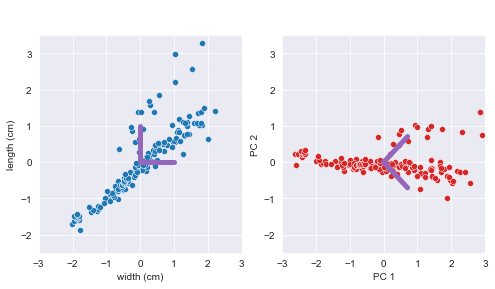

In [14]:
from sklearn.decomposition import PCA

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for ax in axes.flatten():
    ax.set_xlim([-3, 3])
    ax.set_ylim([-2.5, 3.5])

pca_2 = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

pca_2_proj = pca_2.transform(df_std[['width (cm)', 'length (cm)']])

fig.suptitle(" ")
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])
pc_color = sns.color_palette()[4]
# plot components
axes[1].plot(
    [0, pca_2.components_[0, 0]],
    [0, pca_2.components_[1, 0]],
    color=pc_color,
    linewidth=5
)
axes[1].plot(
    [0, pca_2.components_[0, 1]],
    [0, pca_2.components_[1, 1]],
    color=pc_color,
    linewidth=5
)

gfg = sns.scatterplot(x=pca_2_proj[:, 0], y=pca_2_proj[:, 1], color=sns.color_palette()[3], ax=axes[1])
axes[0].plot([0, 1], [0, 0], color=pc_color, linewidth=5)
axes[0].plot([0, 0], [0, 1], color=pc_color, linewidth=5)
gfg.set_xlabel("PC 1")
gfg.set_ylabel("PC 2")
plt.show()

In [15]:
from sklearn.decomposition import PCA
import imageio

pca_2 = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

filenames = []

# pca_2_proj = pca_2.transform(df_std[['width (cm)', 'length (cm)']])
U = pca_2.components_
I = np.eye(2)

# build gif
print("Build GIF...")
steps = 100
for i in tqdm(range(steps, -1, -1)):

    fig, ax = plt.subplots(1, 1, figsize=(4, 4))

    ax.set_xlim([-3, 3])
    ax.set_ylim([-2.5, 3.5])

    w = i / steps
    U_p = w * I + (1 - w) * U
    pca_2_proj = U_p.dot(df_std[['width (cm)', 'length (cm)']].values.transpose()).transpose()
    pca_2_basis = U_p.dot(pca_2.components_.transpose())

    fig.suptitle(" ")
    # sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=axes[0])

    gfg = sns.scatterplot(x=pca_2_proj[:, 0], y=pca_2_proj[:, 1], color=sns.color_palette()[3], ax=ax)
    ax.plot([-pca_2_basis[0, 0]*10, pca_2_basis[0, 0]*10], [-pca_2_basis[1, 0]*10, pca_2_basis[1, 0]*10], color=colors[0])
    ax.plot([-pca_2_basis[0, 1]*10, pca_2_basis[0, 1]*10], [-pca_2_basis[1, 1]*10, pca_2_basis[1, 1]*10], color=colors[1])
    if i == 0:
        gfg.set_xlabel("PC 1")
        gfg.set_ylabel("PC 2")
    filename = os.path.join(out_dir, f"temp_{i}.png")
    filenames.append(filename)
    plt.savefig(filename)
    plt.close()

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
last_frame = imageio.imread(filenames[-1])
for i in range(steps): # Add last frame for a while
    images.append(last_frame)
imageio.mimsave(os.path.join(out_dir, 'pca_2d.gif'), images, duration = 5 / (steps*2))

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")
plt.close()

Build GIF...


100%|██████████| 101/101 [00:50<00:00,  1.99it/s]
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_69004/1721240346.py:43: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_69004/1721240346.py:44: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  last_frame = imageio.imread(filenames[-1])


Delete generated frames...
All done


In [16]:
temp = df_std[['width (cm)', 'length (cm)']]
temp = temp.loc[[1, 150]]
display(temp)
display(pd.DataFrame(pca_2.transform(temp), columns=['PCA 1', 'PCA 2'], index=temp.index))

,width (cm),length (cm)
1,-0.066579,-0.225507
150,-1.863907,-1.550149


,PCA 1,PCA 2
1,-0.206536,-0.112379
150,-2.414103,0.221860


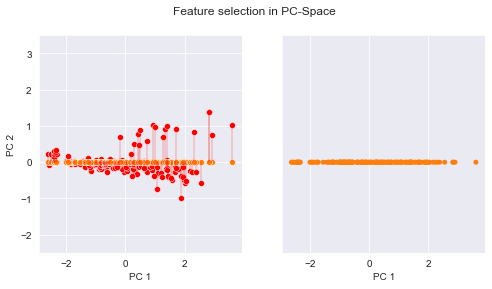

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Feature selection in PC-Space")
sns.scatterplot(x=pca_2_proj[:, 0], y=pca_2_proj[:, 1], ax=axes[0], color='red')
gfg = sns.scatterplot(x=pca_2_proj[:, 0], y=0, ax=axes[0], color=sns.color_palette()[1])
gfg.set_xlabel("PC 1")
gfg.set_ylabel("PC 2")
# sns.scatterplot(data=df_std, x=0, y='length (cm)', ax=axes[0])

for x, y in zip(pca_2_proj[:, 0], pca_2_proj[:, 1]):
    plot_error_y(x, y, 0, axes[0])

gfg = sns.stripplot(x=pca_2_proj[:, 0], ax=axes[1], jitter=0, color=sns.color_palette()[1])
gfg.set_xlabel("PC 1")
for ax in axes:
    # ax.set_xlim((-2.5, 3.5))
    ax.set_ylim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, 'pca-selection-1.png'), facecolor='white', transparent=False)
plt.show()

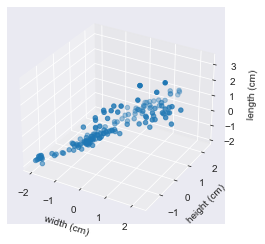

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax)
plt.show()

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_1 = PCA(n_components=1).fit(df_std[['width (cm)', 'height (cm)', 'length (cm)']])
df_std_pca = pca.fit_transform(df_std[['width (cm)', 'height (cm)', 'length (cm)']])

In [20]:
pc_1 = pca.components_[:, 0]
pc_2 = pca.components_[:, 1]
pc_3 = pca.components_[:, 2]

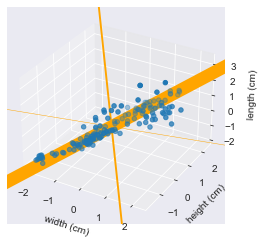

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

pca_1_data = pca_1.inverse_transform(df_std_pca[:, 0].reshape(-1, 1))

plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax)
ax.scatter(pca_1_data[:, 0], pca_1_data[:, 1], pca_1_data[:, 2], color='red')
plt.autoscale(False)
scale_f = 10
ax.plot3D([-pc_1[0]*scale_f, pc_1[0]*scale_f], [-pc_1[1]*scale_f, pc_1[1]*scale_f], [-pc_1[2]*scale_f, pc_1[2]*scale_f], color='orange', linewidth=pca.explained_variance_[0]*5)
ax.plot3D([-pc_2[0]*scale_f, pc_2[0]*scale_f], [-pc_2[1]*scale_f, pc_2[1]*scale_f], [-pc_2[2]*scale_f, pc_2[2]*scale_f], color='orange', linewidth=pca.explained_variance_[1]*5)
ax.plot3D([-pc_3[0]*scale_f, pc_3[0]*scale_f], [-pc_3[1]*scale_f, pc_3[1]*scale_f], [-pc_3[2]*scale_f, pc_3[2]*scale_f], color='orange', linewidth=pca.explained_variance_[2]*5)

plt.show()

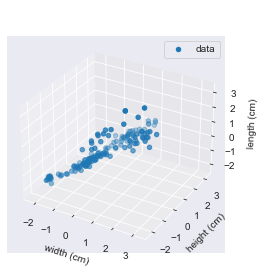

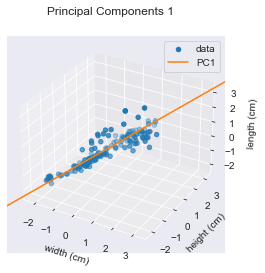

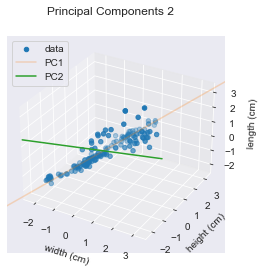

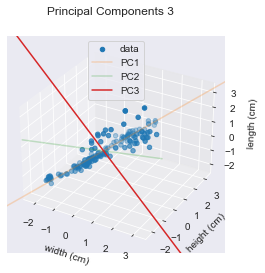

In [22]:
from sklearn.decomposition import PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax)
fig.suptitle(f" ")
ax.legend(['data'])
ax.set_xlim((-2.5, 3.5)), ax.set_zlim((-2.5, 3.5)), ax.set_ylim((-2.5, 3.5))
plt.savefig(os.path.join(out_dir, f'pca-3d-anim-data.png'), facecolor='white', bbox_inches='tight', transparent=False)
plt.show()

pca = PCA(n_components=3).fit(df_std[['width (cm)', 'height (cm)', 'length (cm)']])

colors = list(sns.color_palette())[1:]

for i in range(1, 4):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    fig.suptitle(f"Principal Components {i}")
    plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax)

    for j in range(i - 1):
        # plot components
        ax.plot3D(
            [-pca.components_[j, 0]*10, pca.components_[j, 0]*10],
            [-pca.components_[j, 1]*10, pca.components_[j, 1]*10],
            [-pca.components_[j, 2]*10, pca.components_[j, 2]*10],
            color=colors[j],
            # linewidth=pca.explained_variance_[j] * 5,
            alpha=0.25
        )

    # plot components
    ax.plot3D(
        [-pca.components_[i-1, 0]*10, pca.components_[i-1, 0]*10],
        [-pca.components_[i-1, 1]*10, pca.components_[i-1, 1]*10],
        [-pca.components_[i-1, 2]*10, pca.components_[i-1, 2]*10],
        color=colors[i-1],
        # linewidth=5
    )

    ax.legend(['data', 'PC1', 'PC2', 'PC3'])
    ax.set_xlim((-2.5, 3.5)), ax.set_zlim((-2.5, 3.5)), ax.set_ylim((-2.5, 3.5))
    plt.savefig(os.path.join(out_dir, f'pca-3d-anim-{i}.png'), facecolor='white', bbox_inches='tight', transparent=False)

    plt.show()

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
fig.suptitle(" ")
plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=ax, set_labels=False)

for j in range(i):
    # plot components
    ax.plot3D(
        [-pca.components_[j, 0]*10, pca.components_[j, 0]*10],
        [-pca.components_[j, 1]*10, pca.components_[j, 1]*10],
        [-pca.components_[j, 2]*10, pca.components_[j, 2]*10],
        color=colors[j],
        # linewidth=pca.explained_variance_[j] * 5,
    )

# ax.legend(['data', 'PC1', 'PC2', 'PC3'])
# gfg.set_xlabel("PC 1")
ax.set_xlim((-2.5, 3.5)), ax.set_zlim((-2.5, 3.5)), ax.set_ylim((-2.5, 3.5))

filenames = []
print("Generate frames...")
azim_start = ax.azim
for ii in tqdm(range(0, 360, 2)):
    ax.view_init(azim=(azim_start+ii) % 360)
    filename = os.path.join(out_dir, f"pca-3d-3.frame{ii}.png")
    plt.savefig(filename, bbox_inches='tight', transparent=False)
    filenames.append(filename)

# build gif
print("Build GIF...")
with imageio.get_writer(os.path.join(out_dir, 'pca-3d-3.gif'), mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")
plt.close()

Generate frames...


100%|██████████| 180/180 [01:29<00:00,  2.01it/s]
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_69004/1346523350.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Build GIF...
Delete generated frames...
All done


In [24]:
from sklearn.decomposition import PCA
import imageio

pca = PCA(n_components=3).fit(df_std[['width (cm)', 'height (cm)', 'length (cm)']])

filenames = []

# pca_2_proj = pca_2.transform(df_std[['width (cm)', 'length (cm)']])
U = pca.components_
I = np.eye(3)

# build gif
print("Build GIF...")
print(U.shape)
steps = 100
for i in tqdm(range(steps, -1, -1)):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')

    # plot_data(data=df_std, x='width (cm)', y='height (cm)', z='length (cm)', ax=axes[0], set_labels=True)

    ax.set_xlim((-2.5, 3.5))
    ax.set_zlim((-2.5, 3.5))
    ax.set_ylim((-2.5, 3.5))

    w = i / steps
    U_p = w * I + (1 - w) * U
    pca_proj = U_p.dot(df_std[['width (cm)', 'height (cm)', 'length (cm)']].values.transpose()).transpose()
    pca_basis = U_p.dot(pca.components_.transpose())

    ax.scatter(pca_proj[:, 0], pca_proj[:, 1], pca_proj[:, 2], color='red')

    for j in range(3):
        # plot components
        ax.plot3D(
            [-pca_basis[j, 0]*10, pca_basis[j, 0]*10],
            [-pca_basis[j, 1]*10, pca_basis[j, 1]*10],
            [-pca_basis[j, 2]*10, pca_basis[j, 2]*10],
            color=colors[j],
            # linewidth=pca.explained_variance_[j] * 5,
        )

    if i == 0:
        ax.set_xlabel("PC 1")
        ax.set_ylabel("PC 2")
        ax.set_zlabel("PC 3")

    filename = os.path.join(out_dir, f"temp_{i}.png")
    filenames.append(filename)
    plt.savefig(filename, transparent=False)
    plt.close()

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
last_frame = imageio.imread(filenames[-1])
for i in range(steps): # Add last frame for a while
    images.append(last_frame)
imageio.mimsave(os.path.join(out_dir, 'pca_3d.gif'), images, duration = 5 / (steps*2))

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")

Build GIF...
(3, 3)


100%|██████████| 101/101 [00:43<00:00,  2.30it/s]
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_69004/2194361062.py:56: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_69004/2194361062.py:57: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  last_frame = imageio.imread(filenames[-1])


Delete generated frames...
All done


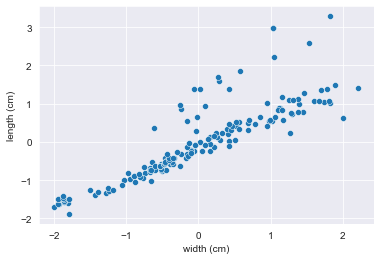

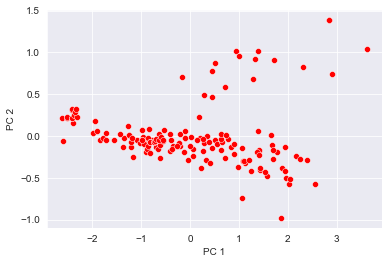

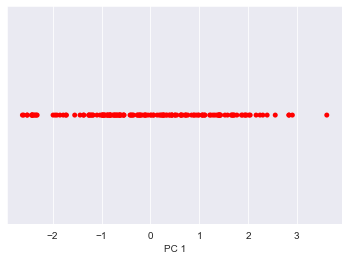

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(df_std[['width (cm)', 'length (cm)']])

fig = plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot(data=df_std, x='width (cm)', y='length (cm)', ax=ax)
plt.savefig(os.path.join(out_dir, 'data-input-space.png'))

fig = plt.figure()
ax = fig.add_subplot(111)
df_pca = df_std.copy()
df_pca[['PC 1', 'PC 2']] = pca.transform(df_std[['width (cm)', 'length (cm)']])
sns.scatterplot(data=df_pca, x='PC 1', y='PC 2', ax=ax, color='red')
plt.savefig(os.path.join(out_dir, 'data-pca-space.png'))

fig = plt.figure()
ax = fig.add_subplot(111)
sns.stripplot(data=df_pca, x='PC 1', ax=ax, jitter=False, color='red')
plt.savefig(os.path.join(out_dir, 'data-pca-space-1d.png'))

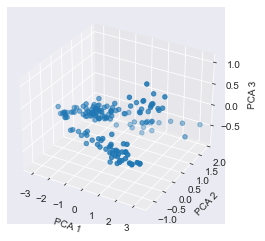

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

ax.scatter(df_std_pca[:, 0], df_std_pca[:, 1], df_std_pca[:, 2])
plt.show()

## Limits

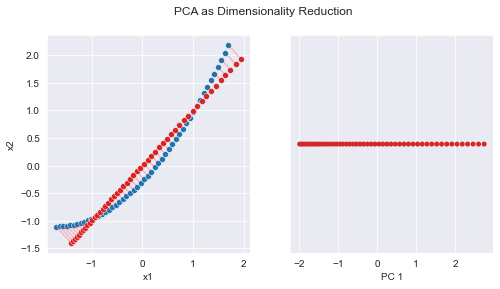

In [27]:
from sklearn.decomposition import PCA

def show_case_non_linear(f):

    x1 = np.arange(50)

    df_ex = pd.DataFrame(StandardScaler().fit_transform(pd.DataFrame({
        "x1": x1,
        "x2": f(x1)
    })), columns=['x1', 'x2'])

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    pca_1 = PCA(n_components=1).fit(df_ex[['x1', 'x2']])

    pca_1_proj = pca_1.transform(df_ex[['x1', 'x2']])
    pca_1_re = pca_1.inverse_transform(pca_1_proj)

    fig.suptitle("PCA as Dimensionality Reduction")
    sns.scatterplot(data=df_ex, x='x1', y='x2', ax=axes[0])
    sns.scatterplot(x=pca_1_re[:, 0], y=pca_1_re[:, 1], color=sns.color_palette()[3], ax=axes[0])

    for (_, row), x2, y2 in zip(df_ex.iterrows(), pca_1_re[:, 0], pca_1_re[:, 1]):
        plot_error_x_y(row['x1'], x2, row['x2'], y2, axes[0])

    gfg = sns.stripplot(x=pca_1_proj, jitter=0, color=sns.color_palette()[3], ax=axes[1])
    gfg.set_xlabel("PC 1")

show_case_non_linear(lambda x: np.power(x, 2))
# plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-possible.png'))
plt.show()

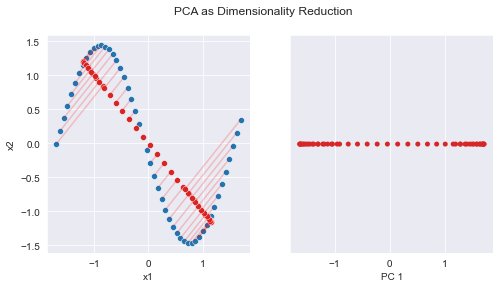

In [28]:
show_case_non_linear(lambda x: np.sin(x / 7.5))
plt.savefig(os.path.join(out_dir, 'example-data-with-model-2d-possible.png'))
plt.show()

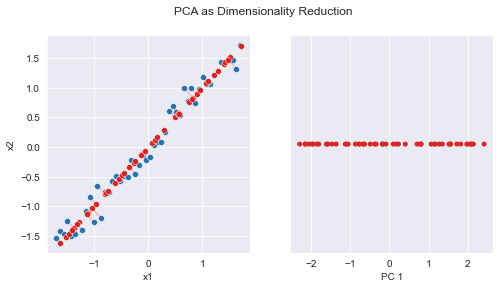

In [29]:
from numpy.random import normal

show_case_non_linear(lambda x: x + 2*normal(size=x.shape[0]))
# plt.savefig(os.path.join(out_dir, 'pca_nolimit.png'))
plt.show()

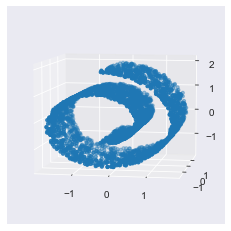

In [30]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap

X, _ = make_swiss_roll(3000, noise=0.05, random_state=0)
X = StandardScaler().fit_transform(X)

# Generate labels
X_proj = Isomap(n_components=2).fit_transform(X)
labels = X_proj[:, 0]

def plot_data(X, ax, color=None):
    ax.scatter(
        X[:, 0],
        X[:, 1],
        X[:, 2],
        s=10,
        c=color
    )

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data(X, ax)
plt.savefig("pca-limit-3d-data.png")
plt.show()

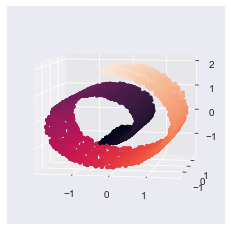

In [31]:
cmap = sns.color_palette("rocket", as_cmap=True)

def plot_data_with_label(X, ax, labels):
    for label in range(6):
        ax.scatter(
            X[:, 0],
            X[:, 1],
            X[:, 2],
            c=labels,
            s=10,
            cmap=cmap
        )

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data_with_label(X, ax, labels)
plt.show()

In [32]:
pca = PCA(n_components=2).fit(X)

pca_proj = pca.transform(X)
pca_re = pca.inverse_transform(pca_proj)

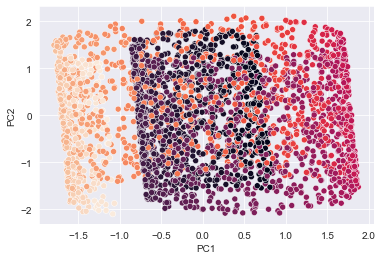

In [33]:
data = pd.DataFrame(dict(
    PC1=pca_proj[:, 0],
    PC2=pca_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='labels', legend=False, palette="rocket")
plt.show()

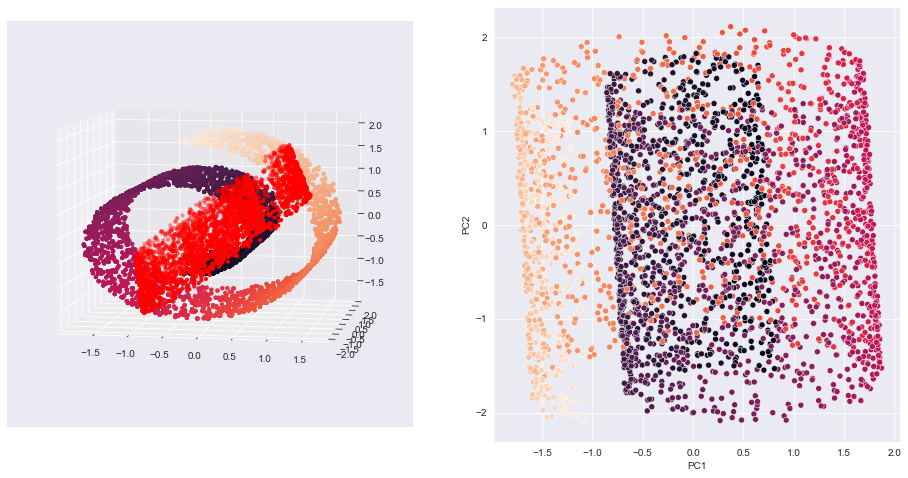

In [34]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121, projection="3d", elev=7, azim=-80)
axProj = fig.add_subplot(122)
plot_data_with_label(X, ax, labels)
plot_data(pca_re, ax=ax, color='red')
data = pd.DataFrame(dict(
    PC1=pca_proj[:, 0],
    PC2=pca_proj[:, 1],
    labels=labels
))
sns.scatterplot(data=data, x='PC1', y='PC2', hue='labels', legend=False, palette="rocket", ax=axProj)
plt.savefig(os.path.join(out_dir, "pca-limit-3d.png"))
plt.show()

In [35]:

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=7, azim=-80)
plot_data_with_label(X, ax, labels)

plot_data(pca_re, ax=ax, color='red')

filenames = []
print("Generate frames...")
for ii in tqdm(range(0, 360, 2)):
    ax.view_init(elev=10., azim=ii)
    filename = os.path.join(out_dir, f"pca-limit-3d.frame{ii}.png")
    plt.savefig(filename, bbox_inches='tight')
    filenames.append(filename)

# build gif
print("Build GIF...")
with imageio.get_writer(os.path.join(out_dir, 'pca-limit-3d.gif'), mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
print("Delete generated frames...")
for filename in set(filenames):
    os.remove(filename)

print("All done")
plt.close()

Generate frames...


100%|██████████| 180/180 [04:39<00:00,  1.55s/it]
/var/folders/7d/vvm6spgd0k97dhyt65d21k600000gn/T/ipykernel_69004/2440712523.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Build GIF...
Delete generated frames...
All done


## CIFAR

In [36]:
raise Error()

NameError: name 'Error' is not defined

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pickle

with open('./data/cifar10/train.pkl', 'rb') as f:
    data_train = pickle.load(f)
X_data = data_train["images"]
y_data = data_train["labels"]

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, random_state=42)

model = Pipeline([
    ('std', StandardScaler()),
    ('pca', PCA(n_components=200)),
    ('clf', SVC(kernel='rbf'))
])

model.fit(X_train.reshape(-1, 32 * 32 * 3), y_train)

In [ ]:
example_img = X_train[4]
print("example_img.shape: ", example_img.shape)

encode = model['pca'].transform(model['std'].transform(example_img.reshape(-1, 32 * 32 * 3)))
print("encode.shape: ", encode.shape)
print("encode: ", encode)
img_rec = model['std'].inverse_transform(model['pca'].inverse_transform(encode)).reshape(32, 32, 3)
print("img_rec.shape: ", img_rec.shape)

img_rec = np.clip(img_rec, 0, 255).astype(int)

plt.imshow(example_img)
plt.axis('off')
plt.savefig(os.path.join(out_dir, "example-img.png"), bbox_inches='tight')
plt.show()

plt.imshow(img_rec)
plt.axis('off')
plt.savefig(os.path.join(out_dir, "example-img-reconstruction.png"), bbox_inches='tight')
plt.show()

In [ ]:
print("N Features: ", model['pca'].n_features_, "N Samples: ", model['pca'].n_samples_, "N Components: ", model['pca'].n_components_, "Explained varianz: ", np.sum(model['pca'].explained_variance_ratio_))

In [ ]:
var = X_train.reshape(37500, -1).var(axis=0)

In [ ]:
var.shape

In [ ]:
print(var)

In [ ]:
index = var.argsort()[-200:][::-1]

In [ ]:
print(np.sum(var[index]) / np.sum(var))

In [ ]:
"""
Visualize pixels where any channel is in the most variable 300 features in input space.
"""

result = np.copy(X_train.reshape(37500, -1))

mask = np.zeros(result.shape[1], dtype=bool)
mask[np.array(index)] = True

pixel_mask = np.any(mask.reshape(32, 32, 3), axis=2)
# result[:, mask] = 255

result = result.reshape(37500, 32, 32, 3)
img = result[4, :, :, :]

img[~pixel_mask, :] = 0

plt.imshow(img)
plt.axis('off')
plt.savefig(os.path.join(out_dir, 'example-img-pixel-selection.png'), bbox_inches='tight')
plt.show()

In [ ]:
black_img = np.zeros(shape=3072)
plt.imshow(black_img.reshape(32, 32, 3))
plt.axis('off')
plt.savefig(os.path.join(out_dir, f"img-space-0-0-0.png"), bbox_inches='tight')
plt.show()

red_img = np.zeros(shape=3072).reshape(32, 32, 3)
red_img[:, :, 0] = 1
plt.imshow(red_img)
plt.axis('off')
plt.savefig(os.path.join(out_dir, f"img-space-1-0-0.png"), bbox_inches='tight')
plt.show()

green_img = np.zeros(shape=3072).reshape(32, 32, 3)
green_img[:, :, 1] = 1
plt.imshow(green_img)
plt.axis('off')
plt.savefig(os.path.join(out_dir, f"img-space-0-1-0.png"), bbox_inches='tight')
plt.show()

blue_img = np.zeros(shape=3072).reshape(32, 32, 3)
blue_img[:, :, 2] = 1
plt.imshow(blue_img)
plt.axis('off')
plt.savefig(os.path.join(out_dir, f"img-space-0-0-1.png"), bbox_inches='tight')
plt.show()

white_img = np.ones(shape=3072)
plt.imshow(white_img.reshape(32, 32, 3))
plt.axis('off')
plt.savefig(os.path.join(out_dir, f"img-space-1-1-1.png"), bbox_inches='tight')
plt.show()

for i in range(10):
    random_img = np.random.uniform(0, 1, size=3072)
    plt.imshow(random_img.reshape(32, 32, 3))
    plt.axis('off')
    plt.savefig(os.path.join(out_dir, f"img-space-random-{i}.png"), bbox_inches='tight')
    plt.show()

In [ ]:
for i in range(10):
    img = X_val[i]
    plt.imshow(img.reshape(32, 32, 3))
    plt.axis('off')
    plt.savefig(os.path.join(out_dir, f"img-space-cifar-{i}.png"), bbox_inches='tight')
    plt.show()